<a href="https://colab.research.google.com/github/11abdellah11/Computer_Vision_GANs/blob/main/GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import math

In [34]:
torch.manual_seed(111)

In [35]:
train_data_len = 1024
train_data = torch.zeros((train_data_len,2))
train_data[:,0] = 2*math.pi*torch.rand(train_data_len)
train_data[:,1] = torch.sin(train_data[:,0])
train_labels = torch.zeros(train_data_len)
train_set = [(train_data,train_labels) for i in range(train_data_len)]

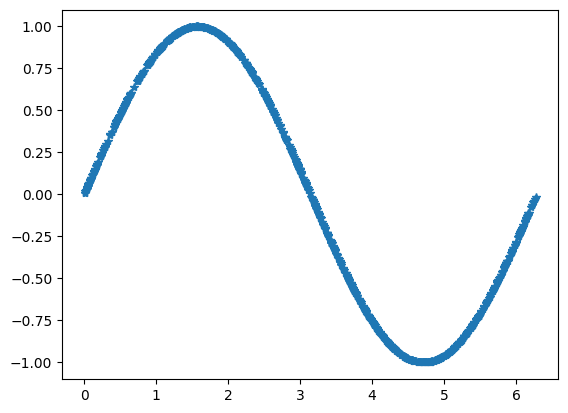

In [36]:
plt.plot(train_data[:,0],train_data[:,1],'*')

In [37]:
train_labels

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [38]:
train_data

tensor([[ 4.4960, -0.9767],
        [ 5.7428, -0.5145],
        [ 1.7710,  0.9800],
        ...,
        [ 4.4772, -0.9725],
        [ 3.2305, -0.0887],
        [ 4.0663, -0.7984]])

In [39]:
# Preparing the dataset for training:

In [40]:
train_set

[(tensor([[ 4.4960, -0.9767],
          [ 5.7428, -0.5145],
          [ 1.7710,  0.9800],
          ...,
          [ 4.4772, -0.9725],
          [ 3.2305, -0.0887],
          [ 4.0663, -0.7984]]),
  tensor([0., 0., 0.,  ..., 0., 0., 0.])),
 (tensor([[ 4.4960, -0.9767],
          [ 5.7428, -0.5145],
          [ 1.7710,  0.9800],
          ...,
          [ 4.4772, -0.9725],
          [ 3.2305, -0.0887],
          [ 4.0663, -0.7984]]),
  tensor([0., 0., 0.,  ..., 0., 0., 0.])),
 (tensor([[ 4.4960, -0.9767],
          [ 5.7428, -0.5145],
          [ 1.7710,  0.9800],
          ...,
          [ 4.4772, -0.9725],
          [ 3.2305, -0.0887],
          [ 4.0663, -0.7984]]),
  tensor([0., 0., 0.,  ..., 0., 0., 0.])),
 (tensor([[ 4.4960, -0.9767],
          [ 5.7428, -0.5145],
          [ 1.7710,  0.9800],
          ...,
          [ 4.4772, -0.9725],
          [ 3.2305, -0.0887],
          [ 4.0663, -0.7984]]),
  tensor([0., 0., 0.,  ..., 0., 0., 0.])),
 (tensor([[ 4.4960, -0.9767],
          

Build the discriminator Network

In [41]:
b_size = 32
train_loader = torch.utils.data.DataLoader(train_set,batch_size=b_size)

In [83]:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(nn.Linear(2,256),
                               nn.ReLU(),
                               nn.Dropout(0.3),
                               nn.Linear(256,128),
                               nn.ReLU(),
                               nn.Dropout(0.3),
                               nn.Linear(128,64),
                               nn.ReLU(),
                               nn.Dropout(0.3),
                               nn.Linear(64,1),
                               nn.Sigmoid())
    def forward(self,x):
      output = self.model(x)
      return output


In [84]:
disc = Discriminator()

Generator Net.

In [85]:
class Generator(nn.Module):

  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(nn.Linear(2,16),
                               nn.ReLU(),
                               nn.Linear(16,32),
                               nn.ReLU(),
                               nn.Linear(32,2))


  def forward(self,x):
    output = self.model(x)
    return output



In [86]:
gen =  Generator()

In [87]:
lr = 0.002
num_epochs = 300
loss_func = nn.BCELoss()

In [88]:
disc_optimizer = torch.optim.Adam(disc.parameters(),lr = lr)
gen_optimizer = torch.optim.Adam(gen.parameters(),lr = lr)

In [92]:
for epochs in range(num_epochs):

  for n, (real_samples,_) in enumerate(train_loader) :

    # Discriminator training
    real_samples_labels = torch.ones((b_size,1)) # 1: 'true' samples
    latent_spac_samples = torch.randn((b_size,2))
    generated_samples = gen(latent_spac_samples)
    generated_samples_labels = torch.zeros((b_size)) # 0:'fake' sample

    all_sampl = torch.cat((real_samples,generated_samples))
    all_labels = torch.cat((real_samples_labels,generated_samples_labels))

    disc.zero_grad()
    output_discri = Discriminator(generated_samples)
    loss_disc_network = loss_func(output_discri,all_labels)
    loss_disc_network.backward()

    latent_spac_samples = torch.randn((b_size,2))

    # Generator training

    gen.zero_grad()
    generated_samples = gen(latent_spac_samples)
    output_disc_of_the_generated = disc(generated_samples)

    loss_gen = loss_func(output_disc_of_the_generated,real_samples)
    loss_gen.backward()

    gen_optimizer.step()

    if epochs % 10 == 0 and n == b_size-1:
      print(f"epoch {epochs} loss D: {loss_disc_network}")
      print(f"epoch {epochs} loss G: {loss_gen}")




RuntimeError: ignored